# Dropped Smartphone

> You work for a tech firm developing the newest smartphone that supposedly can survive falls from great heights. Your firm wants to advertise the maximum height from which the phone can be dropped without breaking.
> 
> You are given two of the smartphones and access to a 100-story tower from which you can drop either phone from whatever story you want. If it doesn’t break when it falls, you can retrieve it and use it for future drops. But if it breaks, you don’t get a replacement phone.
> 
> Using the two phones, what is the minimum number of drops you need to ensure that you can determine exactly the highest story from which a dropped phone does not break? (Assume you know that it breaks when dropped from the very top.) What if, instead, the tower were 1,000 stories high? ([via](https://fivethirtyeight.com/features/whats-the-best-way-to-drop-a-smartphone/))

Smartphones are expensive, so this one feels pretty high risk. Let's give it a go.

### The Basic Strategy
Let's say I start on Floor 10, drop Phone A, and it breaks. Now I know that the 'highest non-breaking floor' has to be somewhere between floor 1 and 9 (inclusive). I can start at 1, and then drop at each floor until I reach the floor that breaks the phone. (Note: if 9 doesn't break the phone, we know that's the highest safe floor and Phone B still works fine; in any other case, I'm going to break both phones in order to discover the highest safe floor.)

Imagine, though, that I start on Floor 10, drop Phone A, and it *doesn't* break. Now I run up from there to, say, Floor 20. If Phone A breaks when dropped from Floor 20, I can do the same thing I did before, but starting at Floor 11. Thanks to the first drop, I know that Floors 1 through 11 are safe.

This strategy works for arbitrarily many floors, but it doesn't guarantee a minimum number of drops. Let's say my naïve strategy looks something like this:

In [1]:
naive_floors = [10,20,30,40,50,60,70,80,90,99]

In the best case, `naive_floors` results in only three drops:

| Floor | Phone Used |  Result  |
|:-----:|:----------:|:--------:|
|   10  |      A     |   Break  |
|   1   |      B     | No Break |
|   2   |      B     |   Break  |

However, I could be dropping phones as many as 18 times. The real question, then, is this: how do we optimise the *gaps between floors* when testing with a given tower height such that the worst case is fewer than 19?

### Solving One Hundred

For a 100 story tower, an intuitively option is:

In [2]:
best_floors = [14, 27, 39, 50, 60, 69, 77, 84, 90, 95, 99]

In this case, the best option is also the worst option: in all situations, a total of 14 drops occur.

### Generalising to One Thousand

What makes this the best solution in the 100 floor case? 14 is the smallest number such that:

$$1 + 2 + 3 + 4 + 5 + ... + n \geq 100$$

Given that 

$$1 + 2 + 3 + 4 + 5 + ... + n = \frac{n(n + 1)}{2}$$

We can generalise to the 1000 floor case by finding the smallest $n$ such that:

$$\frac{n(n + 1)}{2} \geq 1000$$

In this case, $n = 45$.

### This Is Pretty Cool Though, Right?
The number of drops needed for any given number of floors has a pretty great (exponential) shape, if you think about it:

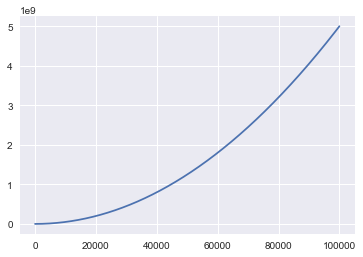

In [27]:
import numpy as np
import matplotlib.pyplot as plt

floors = np.vectorize(lambda n: ((n * (n + 1))/2))

plt.plot(range(100000), floors(range(100000)))
plt.show()

In other words, a tower of 100000 floors requires only 447 drops with two phones.